<a href="https://colab.research.google.com/github/YaelWeisman/Recidivism_ML_Projeect/blob/main/Project_ML_unit4_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_pickle(r"C:/Users/user1/Downloads/df_unit4_to_impute.pkl")
df.head()

,new_id,sex,race,case_type,wcisclass,age_offense,age_judge,prior_felony,prior_misdemeanor,prior_criminal_traffic,...,prior_charges_severity20,prior_charges_severity21,max_hist_jail,min_hist_jail,avg_hist_jail,median_hist_jail,all_races,recid_180d_violent,county_name,ID
0,3.0,1,African American,Felony,Drug Offenses,40.0,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,['African American'],0.0,Milwaukee,1.0
1,6.0,1,Caucasian,Misdemeanor,Violent Crimes,39.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,['Caucasian'],0.0,Kenosha,2.0
2,7.0,1,African American,Misdemeanor,Violent Crimes,17.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,['African American'],0.0,Kenosha,3.0
3,12.0,1,Caucasian,Criminal Traffic,Traffic & Vehicle Offenses,65.0,65.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,['Caucasian'],0.0,Kenosha,4.0
4,17.0,1,African American,Criminal Traffic,Traffic & Vehicle Offenses,51.0,51.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,['African American' 'Caucasian'],0.0,Milwaukee,5.0


In [ ]:
df[df.avg_hist_jail==0].shape ,df[df.max_hist_jail==0].shape,df[df.median_hist_jail==0].shape,df[df.min_hist_jail==0].shape

((899146, 49), (899146, 49), (907183, 49), (961239, 49))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476967 entries, 0 to 1476966
Data columns (total 49 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   new_id                    1476967 non-null  float64 
 1   sex                       1476967 non-null  category
 2   race                      1476967 non-null  category
 3   case_type                 1476967 non-null  category
 4   wcisclass                 1471484 non-null  category
 5   age_offense               1476967 non-null  float64 
 6   age_judge                 1476967 non-null  float64 
 7   prior_felony              1476967 non-null  float64 
 8   prior_misdemeanor         1476967 non-null  float64 
 9   prior_criminal_traffic    1476967 non-null  float64 
 10  highest_severity          1476967 non-null  float64 
 11  release                   1476967 non-null  category
 12  probation                 1032320 non-null  category
 13  is_recid_new

In [ ]:
df.isnull().mean()*100

new_id                       0.000000
sex                          0.000000
race                         0.000000
case_type                    0.000000
wcisclass                    0.371234
age_offense                  0.000000
age_judge                    0.000000
prior_felony                 0.000000
prior_misdemeanor            0.000000
prior_criminal_traffic       0.000000
highest_severity             0.000000
release                      0.000000
probation                   30.105412
is_recid_new                 4.713985
recid_180d                   8.071406
pct_black                    0.000000
pct_hisp                     0.000000
pct_male                     0.000000
pct_rural                    0.000000
pct_urban                    0.000000
pct_college                  0.000000
pct_food_stamps              0.000000
pop_dens                     0.000000
pct_somecollege              0.000000
med_hhinc                    0.000000
year                         0.000000
prior_charge

<Axes: >

<Figure size 1000x600 with 0 Axes>

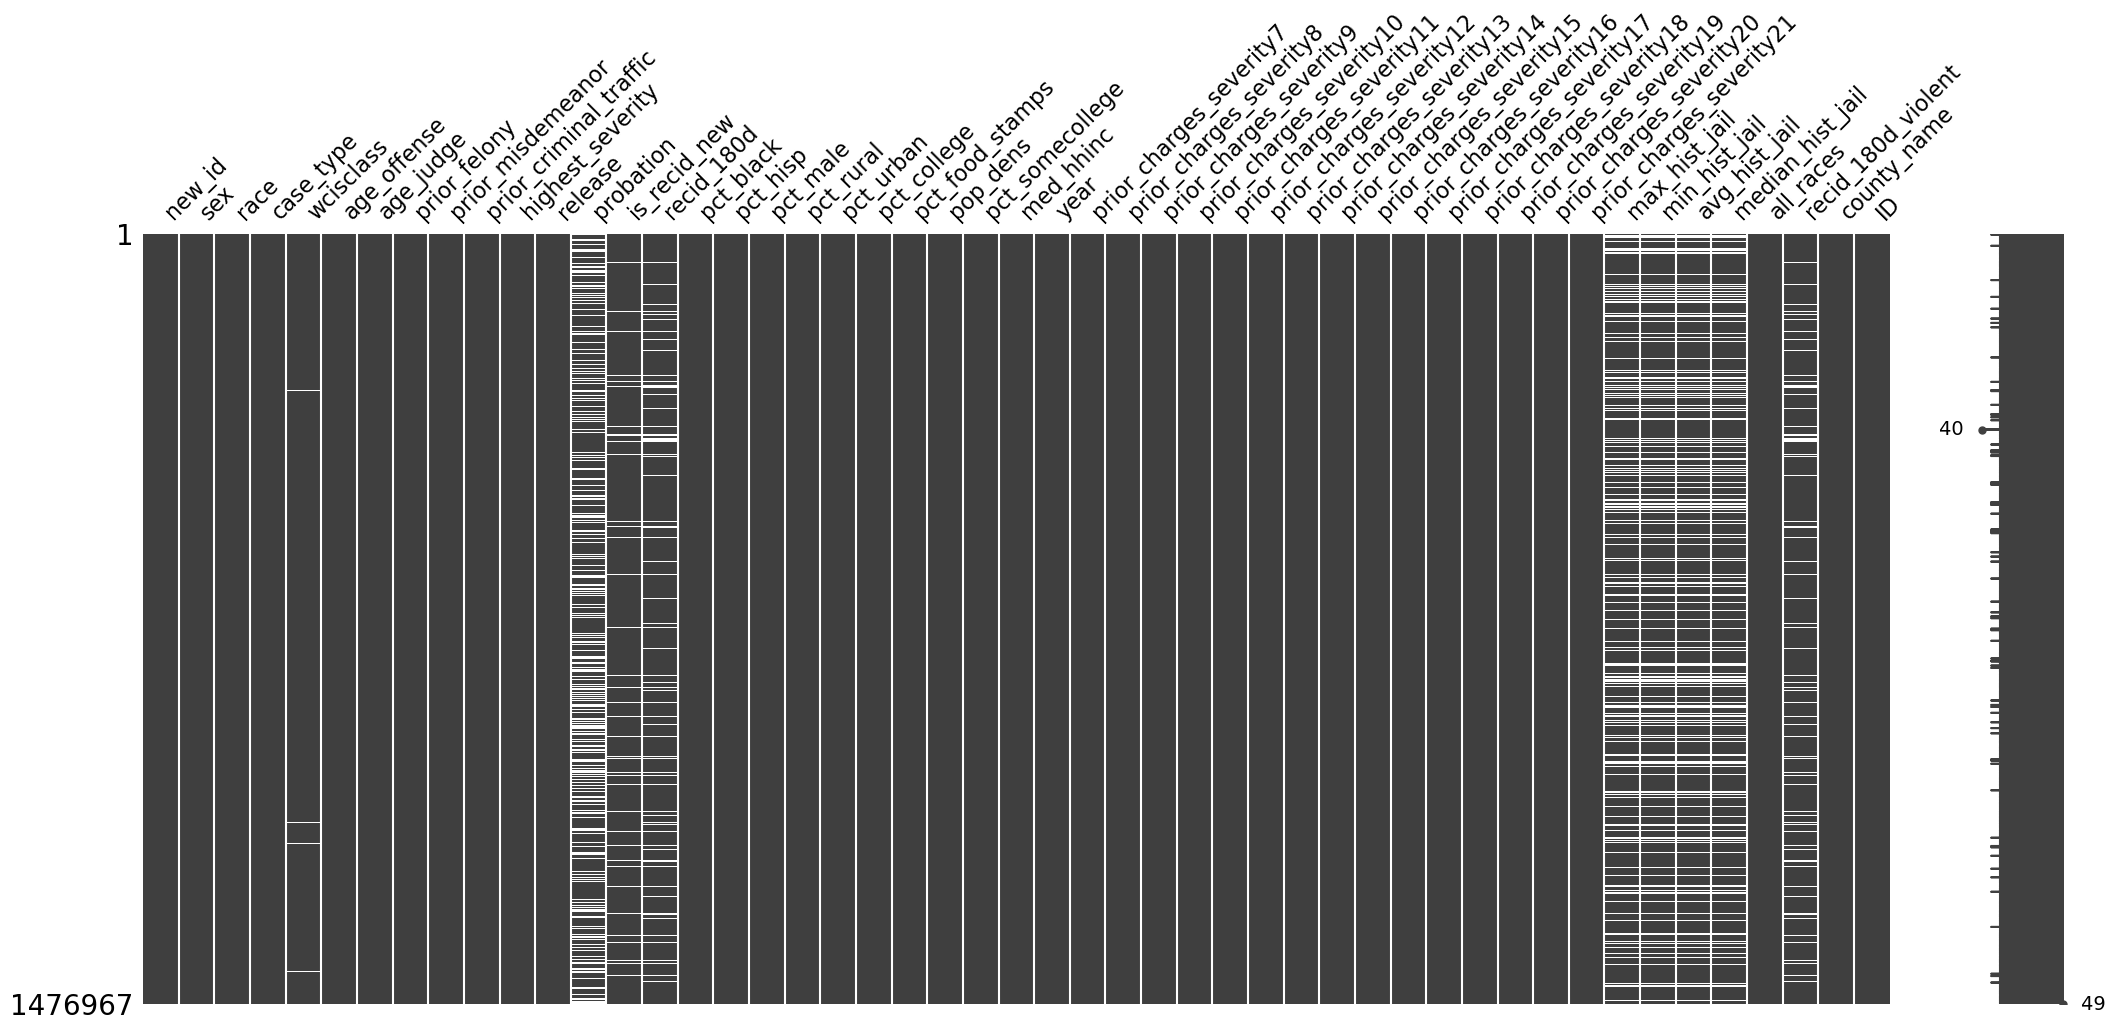

In [ ]:
#plot to reflex the missing values
import missingno as msno
plt.figure(figsize=(10,6))
msno.matrix(df)

#### use Mice to fill the missing data so the missing values will be fill with the highest level of accuracy

i looked for model mice that will run quick and doesnt require encoded

In [ ]:
#a function to make all races as one senteces and not as array of all races
import re
def make_string_stable(x):
    if pd.isna(x):
        return np.nan
    try:
        clean_string = re.sub(r"[\[\]']", "", str(x))
        clean_string = re.sub(r",\s*", "_", clean_string).strip()
        clean_string = clean_string.replace(",", "_")
        return clean_string
    except Exception:
        return np.nan


In [ ]:
df.all_races_1 = df.all_races.apply(make_string_stable)

In [ ]:
df.all_races=df.all_races_1
df.all_races=df.all_races.astype('category')
df.all_races.value_counts()

all_races
Caucasian                                      963584
African American                               318207
Hispanic                                        52974
Hispanic Caucasian                              49147
American Indian or Alaskan Native               44453
American Indian or Alaskan Native Caucasian     19952
African American Caucasian                      15060
Asian or Pacific Islander                       11567
Caucasian Asian or Pacific Islander              1261
Name: count, dtype: int64

In [ ]:
df['all_races'] = df['all_races'].astype('string')
df['race'] = df['race'].astype('string')
df['all_races'] = df['all_races'].replace('nan', pd.NA)
df['all_races'] = df['all_races'].fillna(df['race'])
df.all_races.isnull().sum()

np.int64(0)

In [ ]:
df['all_races'] = df['all_races'].astype('category')
df['race'] = df['race'].astype('category')

In [ ]:
#that are the target value must not tauch it!
X=df.drop(columns=['is_recid_new','recid_180d','recid_180d_violent','probation']) #the EDA reflected  when offesed released so he always gets probition

In [ ]:
#this  model  based on Mice and randomforst can hadle with category and numric too
import miceforest as mf
!pip install lightgbm
import lightgbm as lgb

In [ ]:
import miceforest as mf
#fit on sample
train_sample = X.sample(300000, random_state=42).reset_index(drop=True)
kernel = mf.ImputationKernel(
    data=train_sample,
    random_state=42,
    mean_match_candidates=0
)
# impute data
kernel.mice(iterations=4)
X_imputed_full = kernel.impute_new_data(X)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476967 entries, 0 to 1476966
Data columns (total 49 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   new_id                    1476967 non-null  float64 
 1   sex                       1476967 non-null  category
 2   race                      1476967 non-null  category
 3   case_type                 1476967 non-null  category
 4   wcisclass                 1471484 non-null  category
 5   age_offense               1476967 non-null  float64 
 6   age_judge                 1476967 non-null  float64 
 7   prior_felony              1476967 non-null  float64 
 8   prior_misdemeanor         1476967 non-null  float64 
 9   prior_criminal_traffic    1476967 non-null  float64 
 10  highest_severity          1476967 non-null  float64 
 11  release                   1476967 non-null  category
 12  probation                 1032320 non-null  category
 13  is_recid_new

## MICE (Multiple Imputation by Chained Equations)

In [ ]:
X_imputed_full_df = X_imputed_full.complete_data(0)
#chack the data
(X_imputed_full_df.isnull().mean() * 100).sort_values(ascending=False)

new_id                      0.0
prior_charges_severity7     0.0
prior_charges_severity9     0.0
prior_charges_severity10    0.0
prior_charges_severity11    0.0
prior_charges_severity12    0.0
prior_charges_severity13    0.0
prior_charges_severity14    0.0
prior_charges_severity15    0.0
prior_charges_severity16    0.0
prior_charges_severity17    0.0
prior_charges_severity18    0.0
prior_charges_severity19    0.0
prior_charges_severity20    0.0
prior_charges_severity21    0.0
max_hist_jail               0.0
min_hist_jail               0.0
avg_hist_jail               0.0
median_hist_jail            0.0
all_races                   0.0
county_name                 0.0
prior_charges_severity8     0.0
year                        0.0
sex                         0.0
med_hhinc                   0.0
race                        0.0
case_type                   0.0
wcisclass                   0.0
age_offense                 0.0
age_judge                   0.0
prior_felony                0.0
prior_mi

In [ ]:
nan_counts = X.isnull().sum()
imputed_cols = nan_counts[nan_counts > 0].index.tolist()
print("imputed features:", imputed_cols)


imputed features: ['wcisclass', 'max_hist_jail', 'min_hist_jail', 'avg_hist_jail', 'median_hist_jail']


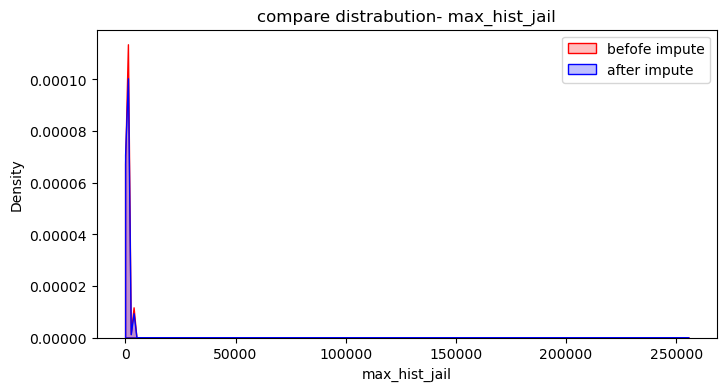

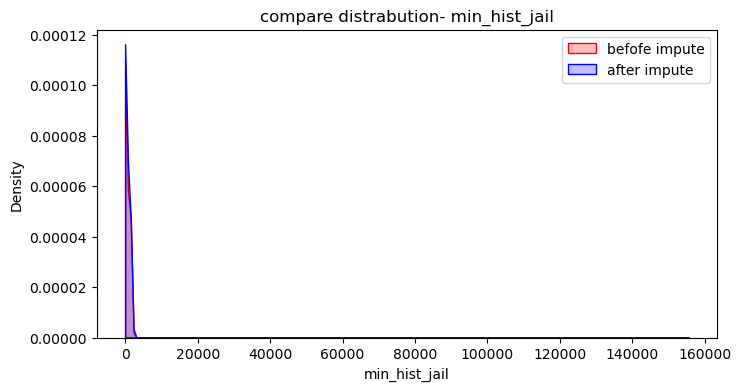

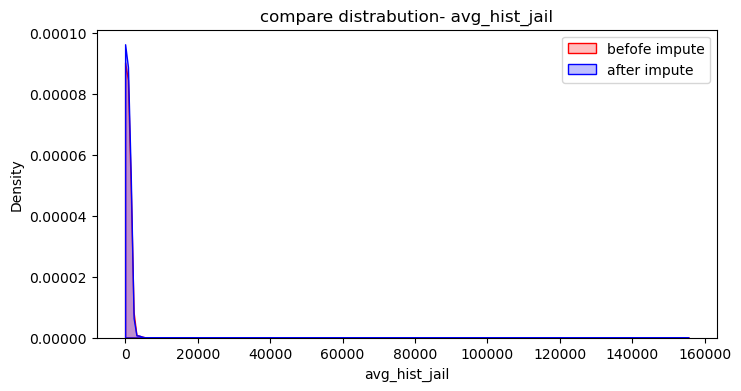

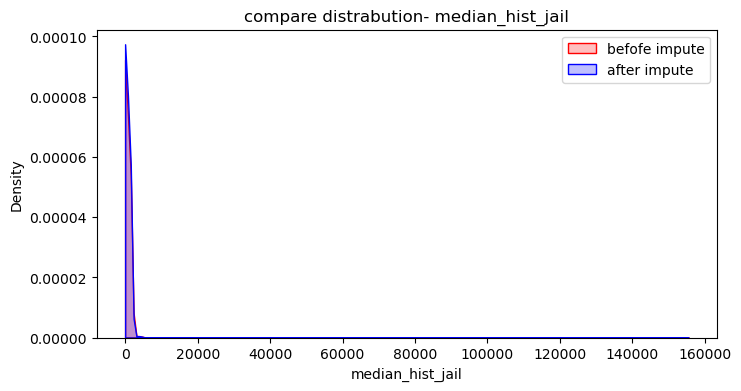

In [ ]:
#Distribution for numric features before and after imputtig
import seaborn as sns
import matplotlib.pyplot as plt

for col in imputed_cols:
    if X[col].dtype.kind in 'biufc':
        plt.figure(figsize=(8,4))
        sns.kdeplot(X[col], label='befofe impute', color='red', fill=True)
        sns.kdeplot(X_imputed_full.complete_data(dataset=0)[col], label='after impute', color='blue', fill=True)
        plt.title(f"compare distrabution- {col}")
        plt.legend()
        plt.show()

In [ ]:
for col in imputed_cols:
    if X[col].dtype.name in ['category']:
        print(f"\column: {col}")
        print("before impute:")
        print(X[col].value_counts(normalize=True))
        print("\n after impute:")
        print(X_imputed_full.complete_data(dataset=0)[col].value_counts(normalize=True))

\column: wcisclass
before impute:
wcisclass
Traffic & Vehicle Offenses       0.286095
Violent Crimes                   0.262871
Property Crimes                  0.153737
Drug Offenses                    0.129598
Public Order & Court Offenses    0.087580
Miscellaneous/Other Offenses     0.039524
Sex & Child-Related Crimes       0.037611
Homicide & Attempted Homicide    0.002985
Name: proportion, dtype: float64

 after impute:
wcisclass
Traffic & Vehicle Offenses       0.286082
Violent Crimes                   0.262900
Property Crimes                  0.153729
Drug Offenses                    0.129613
Public Order & Court Offenses    0.087561
Miscellaneous/Other Offenses     0.039517
Sex & Child-Related Crimes       0.037616
Homicide & Attempted Homicide    0.002980
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

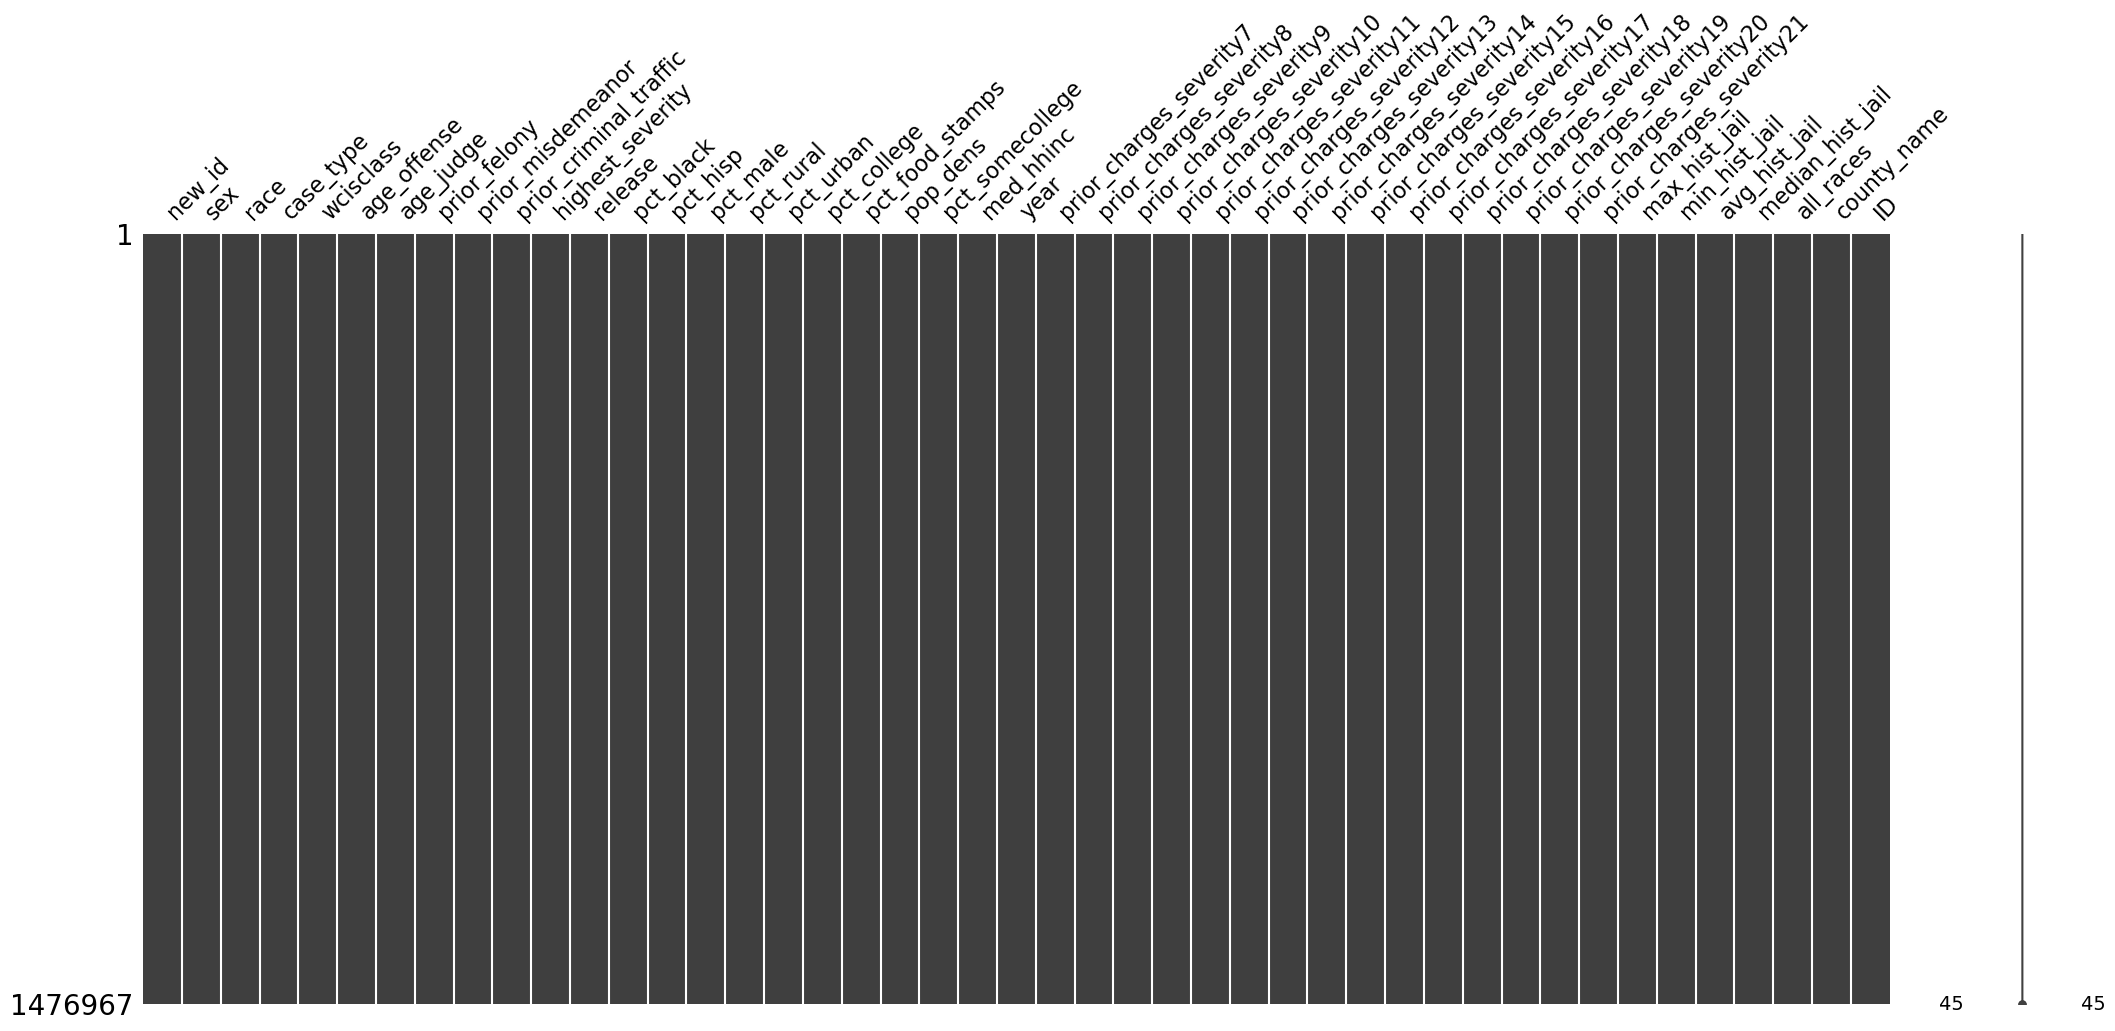

In [ ]:
import missingno as msno
plt.figure(figsize=(10,6))
msno.matrix(X_imputed_full_df)
plt.show()

In [ ]:
df_to_merge=df[['ID','is_recid_new','recid_180d','recid_180d_violent']]
merge_df=pd.merge(X_imputed_full_df, df_to_merge, on='ID', how='inner')
merge_df.shape

(1476967, 48)

In [ ]:
merge_df.to_pickle("df_clean_unit5.pkl")